In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from IPython.display import clear_output

In [24]:
ds_co2_path = nc.Dataset("co2_path.xy.nc")
ds_co2 = nc.Dataset("co2.xy.nc")
ds_u = nc.Dataset("u.xy.nc")
ds_v = nc.Dataset("v.xy.nc")
ds_w = nc.Dataset("w.xy.nc")

In [25]:
co2_path = np.array(ds_co2_path.variables["co2_path"][:])
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

In [26]:
# save co2_path, co2, u, v, w
np.save("co2_path.npy", co2_path)
np.save("co2_xy.npy", co2)
np.save("u_xy.npy", u)
np.save("v_xy.npy", v)
np.save("w_xy.npy", w)

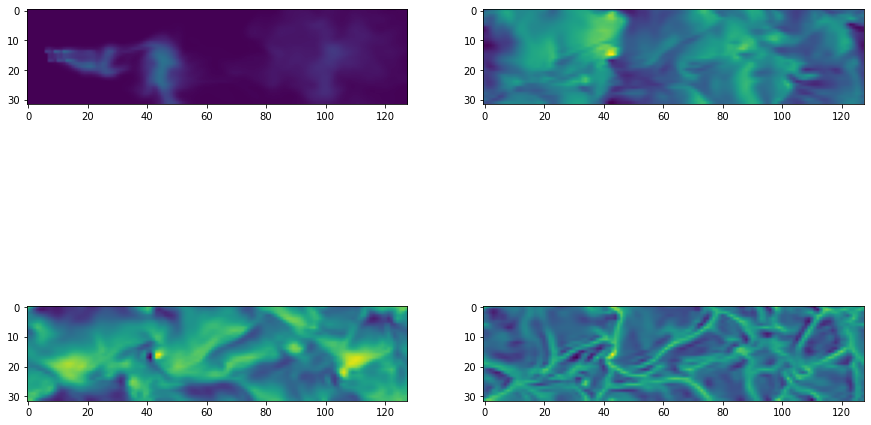

In [5]:
for i in range(len(co2_path)):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(co2_path[i], vmin=0, vmax=0.5)
    plt.subplot(2, 2, 2)
    plt.imshow(u[i, 0])
    plt.subplot(2, 2, 3)
    plt.imshow(v[i, 0])
    plt.subplot(2, 2, 4)
    plt.imshow(w[i, 0])
    plt.pause(0.01)
    clear_output(wait=True)

In [27]:
u_mean = np.mean(u[100:], axis=0)
v_mean = np.mean(v[100:], axis=0)
w_mean = np.mean(w[100:], axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(2, 3))

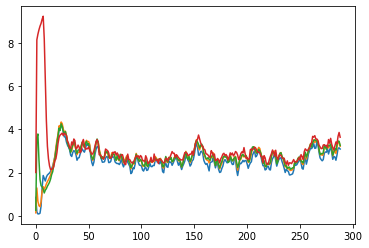

In [28]:
plt.plot(tke_time_series)

In [29]:
np.mean(tke_time_series[-100:], axis=0)

array([2.58833269, 2.78621071, 2.80411978, 2.94425481])

In [30]:
ds_co2 = nc.Dataset("co2.xz.nc")
ds_u = nc.Dataset("u.xz.nc")
ds_v = nc.Dataset("v.xz.nc")
ds_w = nc.Dataset("w.xz.nc")

In [31]:
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

In [32]:
# save co2, u, v, w
np.save("co2_xz.npy", co2)
np.save("u_xz.npy", u)
np.save("v_xz.npy", v)
np.save("w_xz.npy", w)

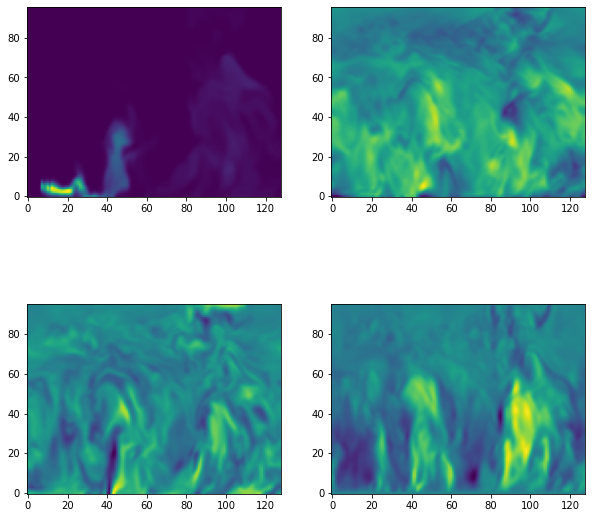

In [12]:
for i in range(len(co2)):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(co2[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 2)
    plt.imshow(u[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 3)
    plt.imshow(v[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 4)
    plt.imshow(w[i, :, 0, :], origin="lower")
    plt.pause(0.01)
    clear_output(wait=True)

In [33]:
u_mean = np.mean(u[100:], axis=0)
v_mean = np.mean(v[100:], axis=0)
w_mean = np.mean(w[100:], axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(1, 3))

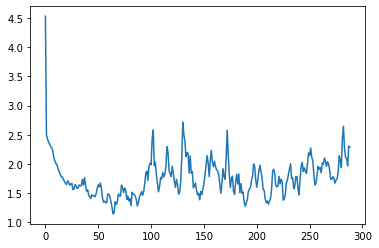

In [34]:
plt.plot(tke_time_series)

In [35]:
np.mean(tke_time_series[-100:], axis=0)

array([1.80254791])